## Textbook

In [1]:
import torch
x = torch.arange(4.0, requires_grad=True)
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [2]:
x.grad

In [3]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [4]:
y.backward()

In [5]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [7]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x, u, x.grad

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([0., 1., 4., 9.]),
 tensor([0., 1., 4., 9.]))

In [8]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [9]:
def f(a):
    b = a * 2
    while b.norm().item() < 1000:
        b = b * 2
    if b.sum().item() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [10]:
a = torch.randn(size=(1,), requires_grad=True)
d = f(a)
d, d.backward()

(tensor([-130047.8984], grad_fn=<MulBackward0>), None)

In [11]:
a, a.grad

(tensor([-1.2700], requires_grad=True), tensor([102400.]))

## Exercise

In [12]:
x = torch.arange(4.0, requires_grad=True)
y = x.sum()
y.backward()
y.backward()
x, x.grad

(tensor([0., 1., 2., 3.], requires_grad=True), tensor([2., 2., 2., 2.]))

In [13]:
a = torch.arange(2.0, requires_grad=True)
d = f(a)
# d, d.backward() # Runtime error for pytorch

In [21]:
import math
from util import *
x = torch.tensor([0.01 * n for n in range(0, 1000)], requires_grad=True)
y =sum(torch.cos(x))
y.backward()
plot(x.detach().numpy(), [torch.cos(x).detach().numpy(), x.grad.detach().numpy()])

0

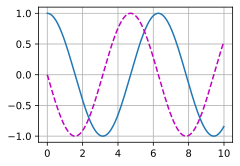

In [22]:
0